# 1. 개요

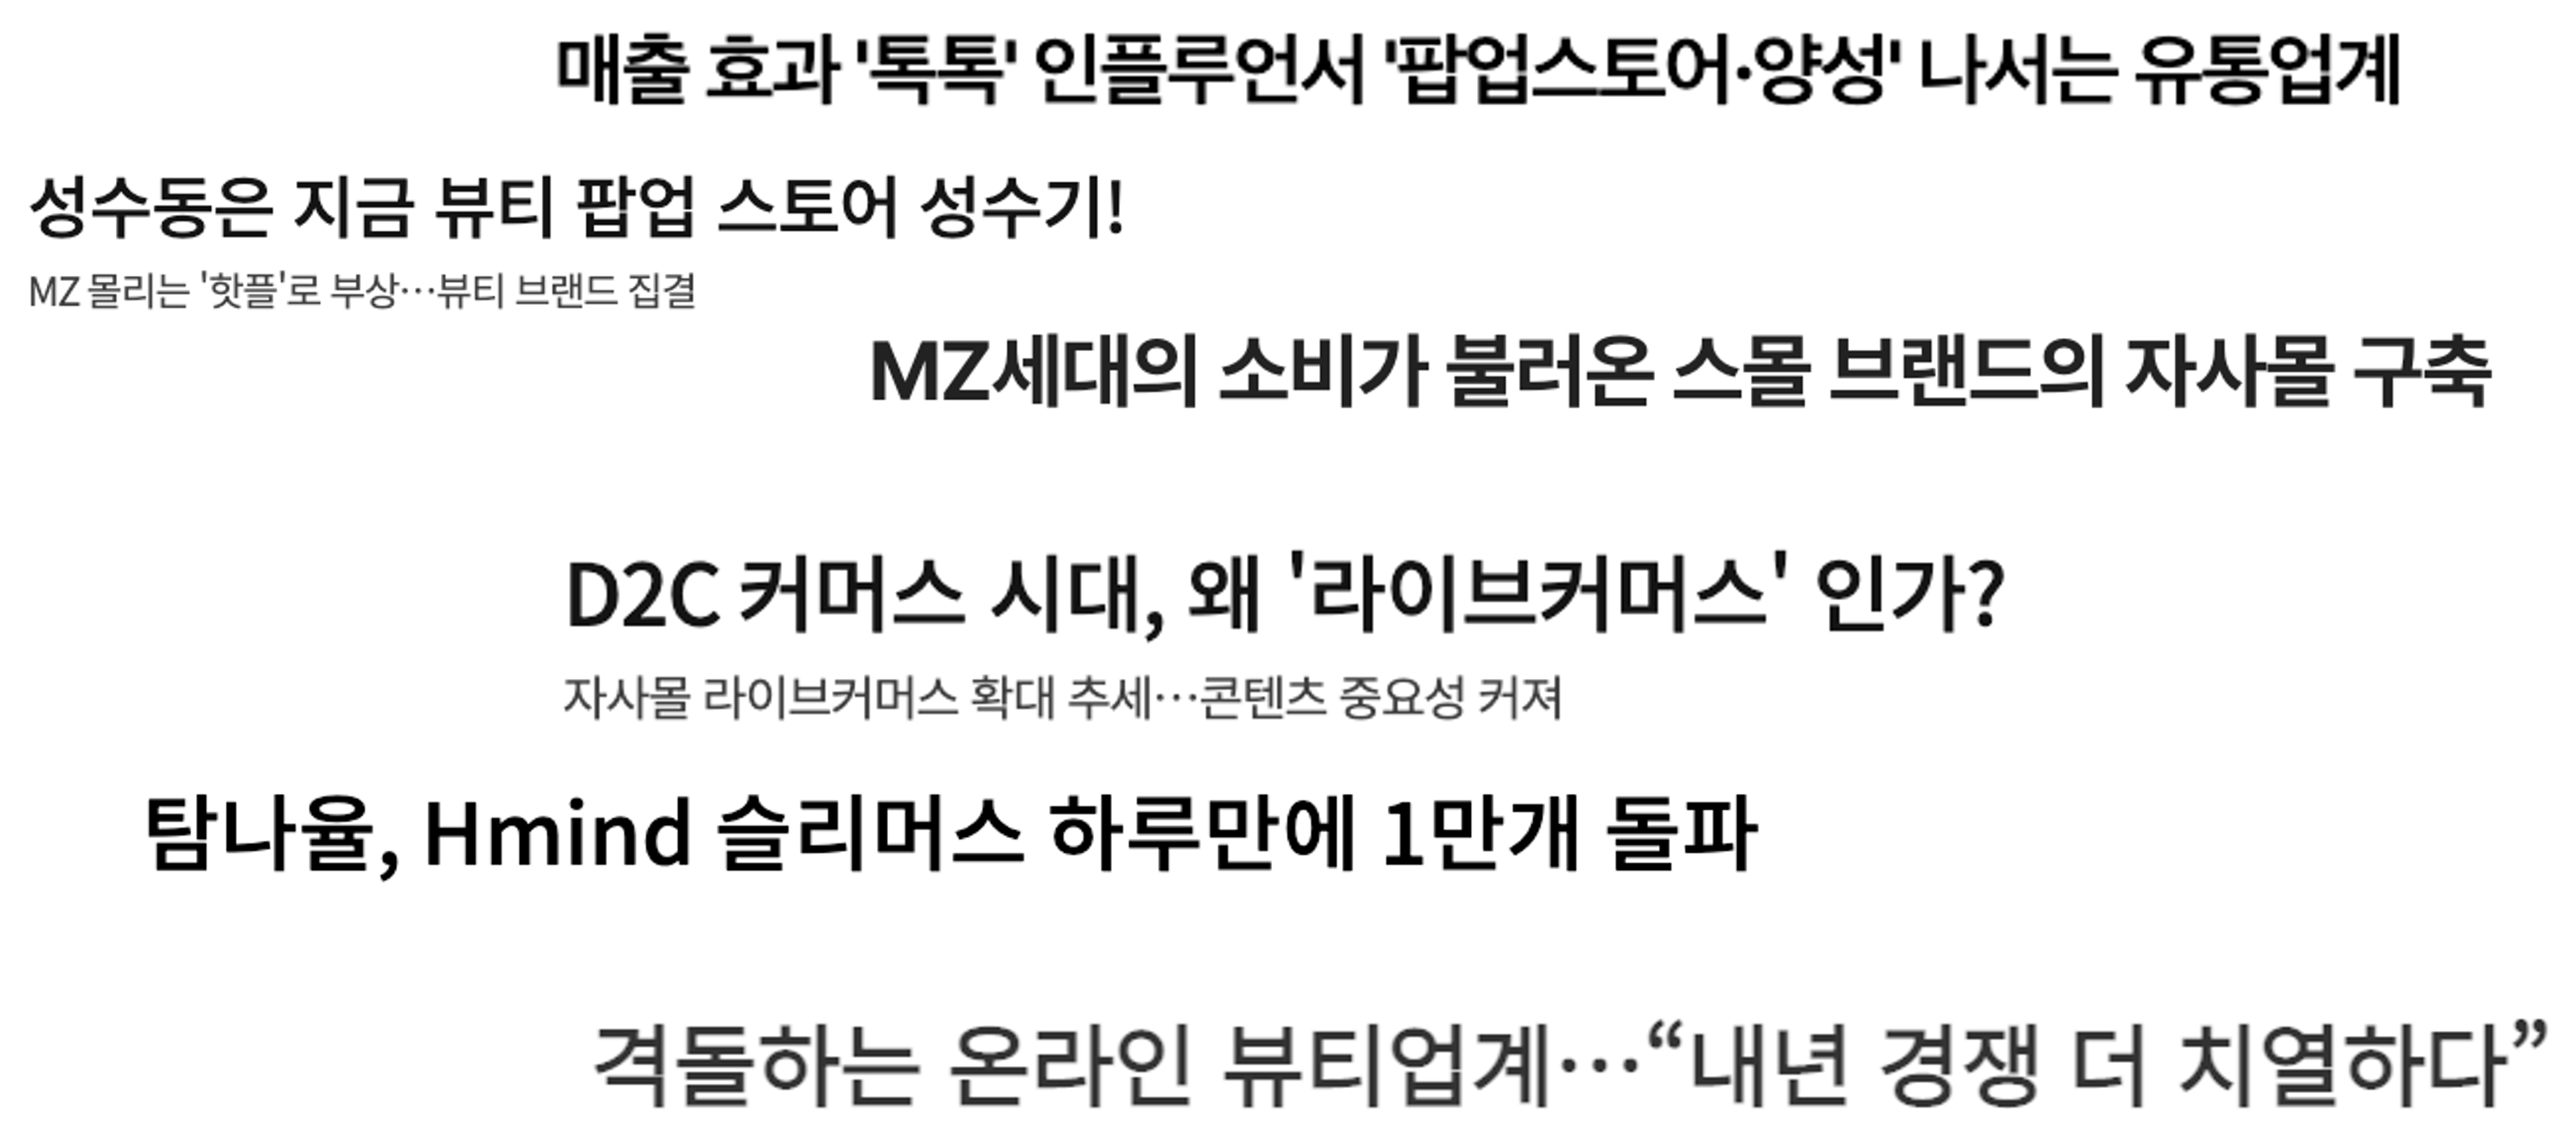

## 프로젝트 분석 목표  

* 포스트 코로나 이후 변화된 시장 기회를 발굴하고 효과적인 고객 전략을 수립하기 위하여, 
* 화장품 시장의 관점에서 온오프라인 소비 행태를 비교 분석하여 인사이트를 제공하고자 한다. 

## 사용 데이터 

* 시간적 범위 : 2020년 1월 ~ 2022년 10월 

* [통계청]
  * 상품군별 판매액 지수 
  * 업태별 상품군 판매액 지수 
  * 상품군별 판매액 
  * 온라인 쇼핑몰 거래액 
  * 전자상거래 구매 정보 습득 경로(2021) 

* 공공 데이터 포털 
  * 소상공인시장진흥공단_상가(상권)정보_서울_202209  

# 2. 분석 및 시각화 

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

#레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## 코로나로 인한 소비 변화 

* 국내 첫 확진자가 발생한 2020년 1월 데이터부터 2022년 10월까지의 데이터 분석 

In [3]:
product = pd.read_csv('/content/drive/MyDrive/뷰티셀렉션/재별_및_상품군별_판매액지수_2015100.0__20221208183817.csv', encoding='cp949')
product = pd.melt(product, id_vars=['재별 및 상품군별'], var_name='yearmonth', value_name='cgi')
product.sample()

,재별 및 상품군별,yearmonth,cgi
625,승용차,2021.12,149.0


In [7]:
# 카테고리 그룹화하기 (중요)
product['cat'] = product['재별 및 상품군별'].apply(lambda x : '패션' if x in ['의복', '가방', '신발', '신발 및 가방'] 
                                                      else ('차량' if x in ['국내 승용차', '수입 승용차', '승용차', '차량연료'] 
                                                      else ('기기') if x in ['통신기기 및 컴퓨터', '통신기기', '컴퓨터'] 
                                                      else x))

# 내구재, 총지수 관련 품목 삭제 
product = product[~product['cat'].str.contains('기타내구재|기타비내구재|기타준내구재|내구재|비내구재|준내구재|총지수(승용차 제외)|총지수|재별 및 상품군별')]

# 2022.09 p), 2022.10 p) 날짜 전처리 
product['yearmonth'] = product['yearmonth'].apply(lambda x : '2022.09' if x == '2022.09 p)' else x)
product['yearmonth'] = product['yearmonth'].apply(lambda x : '2022.10' if x == '2022.10 p)' else x)

# 구매일을 일시 형식으로 포맷팅 
product['yearmonth'] = pd.to_datetime(product['yearmonth']).dt.strftime('%Y-%m')
product['year'] = pd.to_datetime(product['yearmonth']).dt.year
product['month'] = pd.to_datetime(product['yearmonth']).dt.month

# 경상지수 행 삭제 
product = product[product['cgi'] != '경상지수']

# float으로 변경 
product['cgi'] = product['cgi'].astype(float)

<ipython-input-7-bd02fa8d3be9>:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  product = product[~product['cat'].str.contains('기타내구재|기타비내구재|기타준내구재|내구재|비내구재|준내구재|총지수(승용차 제외)|총지수|재별 및 상품군별')]


In [8]:
product_year = product.groupby(['cat','year'])['cgi'].mean().reset_index().sort_values(ascending=False, by='cgi')
product_yearmonth = product.groupby(['cat','year', 'month',])['cgi'].mean().reset_index().sort_values(ascending=False, by='cgi')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

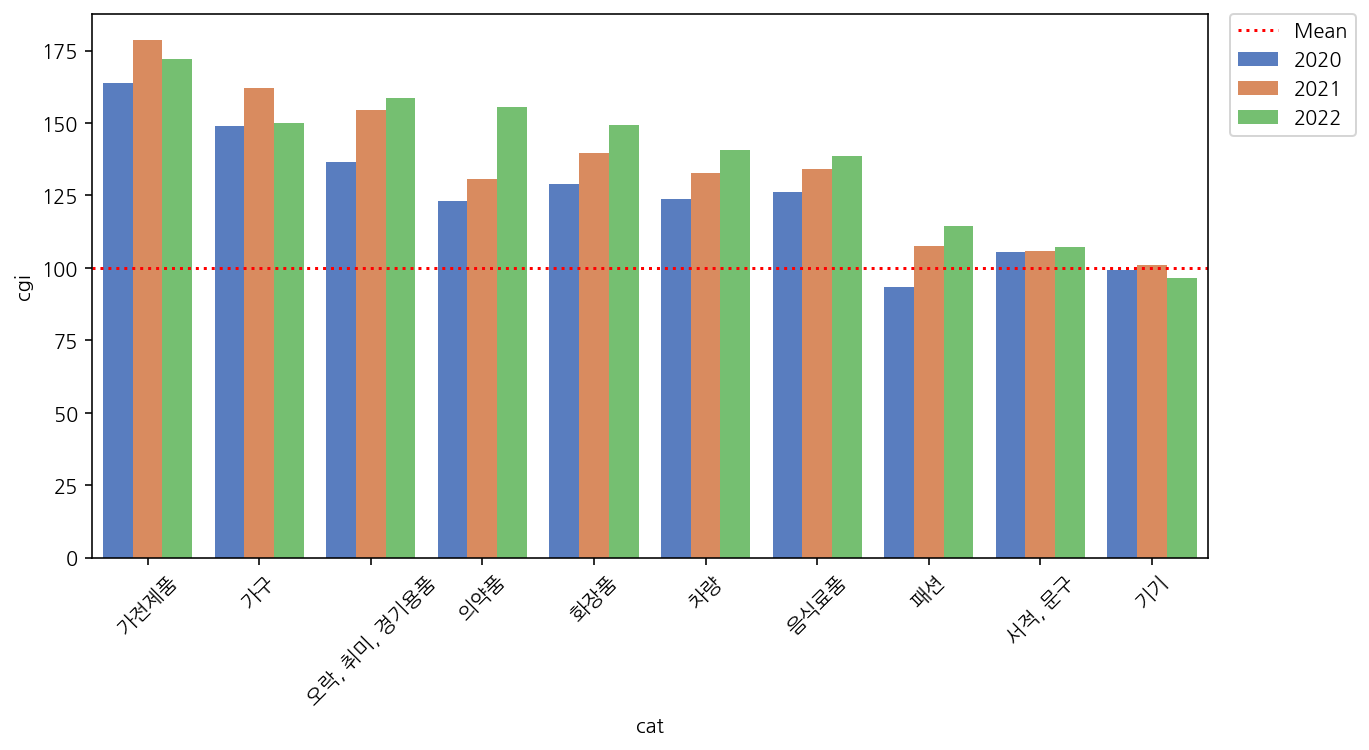

In [9]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=product_year.sort_values(by='cgi', ascending=False), x='cat', y='cgi', hue='year', palette='muted', ci=None)
ax.axhline(100, label='Mean', linestyle=':', color='red') 

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) 
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

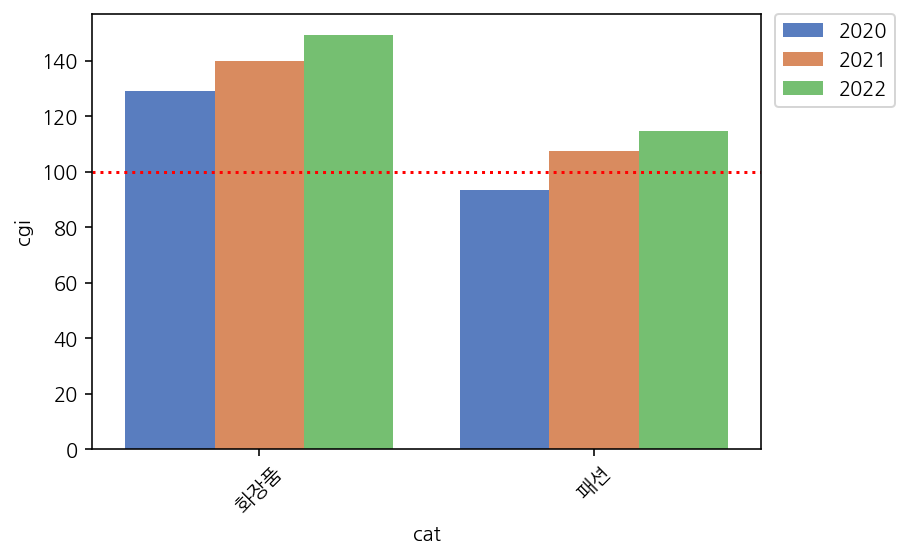

In [10]:
cat_features = ['화장품', '패션']

ax = sns.barplot(data=product_year[(product_year['cat'].isin(cat_features))].sort_values(by='cgi', ascending=False), x='cat', y='cgi',palette='muted', hue='year', ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) 
ax.axhline(100, label='Mean', linestyle=':', color='red') 
plt.xticks(rotation=45)

* 화장품의 소비 지수는 연 평균 120 이상으로 코로나의 영향을 받지 않은 것으로 보인다.
* 패션 품목은 코로나의 영향으로 매출이 감소하였지만, 이후 매출이 호전되는 추세

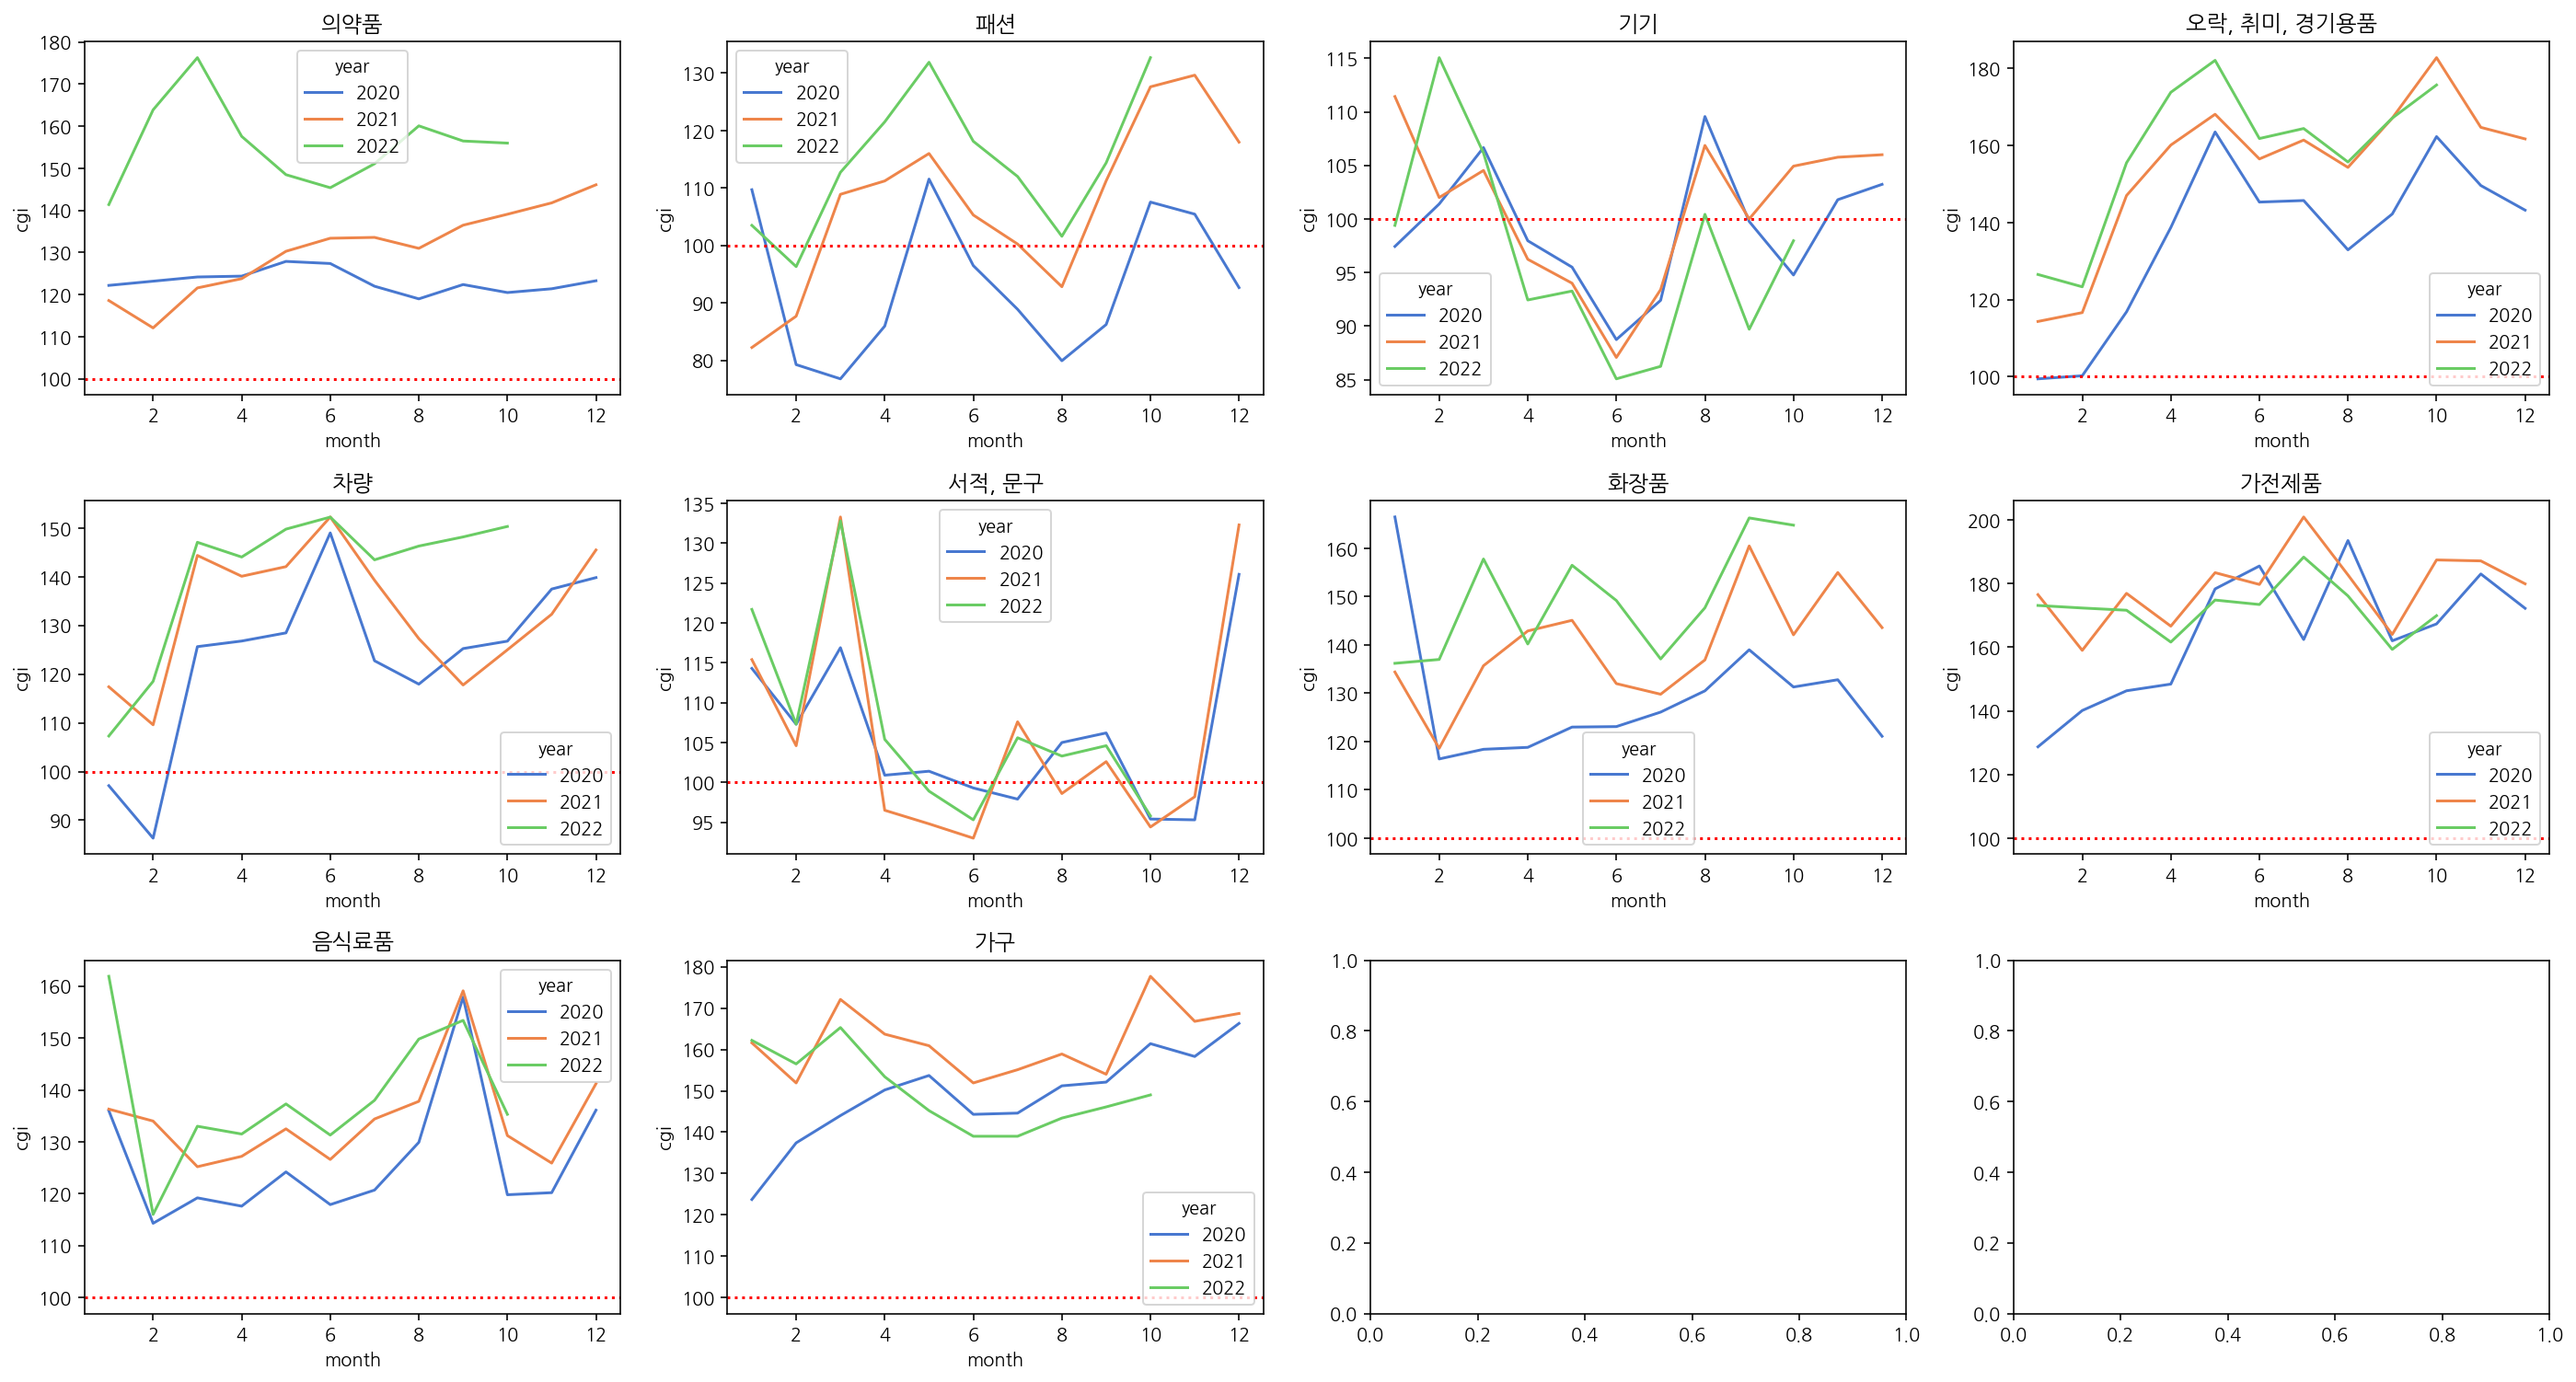

In [14]:
cat_features = list(set(product_yearmonth['cat']))

fig, axs = plt.subplots(figsize=(24,12), ncols=4, nrows=3)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    g = sns.lineplot(data=product_yearmonth[product_yearmonth['cat']==feature], x='month', y='cgi', hue='year', palette='muted', ax=axs[row][col])
    g.set_title(feature) # seaborn에 title 추가 
    g.axhline(100, label='Mean', linestyle=':', color='red') 

* 현재 의약품, 패션, 화장품 시장은 매출이 성장하고 있다. 
* 패션 카테고리는 계절적 영향에 따라 다소 매출의 낙폭이 있지만, 의약품/패션/화장품 시장은 유망하다고 볼 수 있다. 

## 오프라인/온라인 소비 변화 

In [55]:
online = pd.read_csv('/content/drive/MyDrive/뷰티셀렉션/온라인쇼핑몰_판매매체별_상품군별거래액_20221208201622.csv', encoding='cp949')
online = pd.melt(online, id_vars=['상품군별', '판매매체별'], var_name='yearmonth', value_name='amount')
online.sample()

,상품군별,판매매체별,yearmonth,amount
468,신발,계,2022.08,253609


In [57]:
# 2022.09 p), 2022.10 p) 날짜 전처리 
online['yearmonth'] = online['yearmonth'].apply(lambda x : '2022.09' if x == '2022.09 p)' else x)
online['yearmonth'] = online['yearmonth'].apply(lambda x : '2022.10' if x == '2022.10 p)' else x)

# 카테고리 그룹화
online['cat'] = online['상품군별'].apply(lambda x : '패션' if x in ['의복', '가방', '신발', '패션용품 및 액세서리'] else x)

# 판매매체별 > 계 삭제 
online = online[online['판매매체별'] != '계']

# 구매일을 일시 형식으로 포맷팅 
online['yearmonth'] = pd.to_datetime(online['yearmonth']).dt.strftime('%Y-%m')
online['year'] = pd.to_datetime(online['yearmonth']).dt.year
online['month'] = pd.to_datetime(online['yearmonth']).dt.month
online.sample()

<ipython-input-57-ae923b30ef4a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online['yearmonth'] = pd.to_datetime(online['yearmonth']).dt.strftime('%Y-%m')
<ipython-input-57-ae923b30ef4a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online['year'] = pd.to_datetime(online['yearmonth']).dt.year
<ipython-input-57-ae923b30ef4a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,상품군별,판매매체별,yearmonth,amount,cat,year,month
53,가방,모바일쇼핑,2020-04,149498,패션,2020,4


In [58]:
online_year = online.groupby(['cat','판매매체별', 'year'])['amount'].sum().reset_index().sort_values(ascending=False, by='amount')
online_yearmonth = online.groupby(['cat','판매매체별', 'year', 'month'])['amount'].sum().reset_index().sort_values(ascending=False, by='amount')

In [68]:
sales = pd.read_csv('/content/drive/MyDrive/뷰티셀렉션/재별_및_상품군별_판매액_20221208222106.csv', encoding='cp949')
sales = sales[sales['상품군별']!='상품군별']
sales = pd.melt(sales, id_vars='상품군별', var_name='yearmonth',value_name='amount')
sales.sample()

,상품군별,yearmonth,amount
294,"오락, 취미, 경기용품",2022.01,992517


In [70]:
# 2022.09 p), 2022.10 p) 날짜 전처리 
sales['yearmonth'] = sales['yearmonth'].apply(lambda x : '2022.09' if x == '2022.09 p)' else x)
sales['yearmonth'] = sales['yearmonth'].apply(lambda x : '2022.10' if x == '2022.10 p)' else x)

# 카테고리 그룹화
sales['cat'] = sales['상품군별'].apply(lambda x : '패션' if x in ['의복', '신발 및 가방'] else x) 

# 구매일을 일시 형식으로 포맷팅 
sales['yearmonth'] = pd.to_datetime(sales['yearmonth']).dt.strftime('%Y-%m')
sales['year'] = pd.to_datetime(sales['yearmonth']).dt.year
sales['month'] = pd.to_datetime(sales['yearmonth']).dt.month
sales['amount'] = sales['amount'].astype(int)

sales_year = sales.groupby(['cat', 'year'])['amount'].sum().reset_index().sort_values(ascending=False, by='amount')
sales_yearmonth = sales.groupby(['cat', 'year', 'month'])['amount'].sum().reset_index().sort_values(ascending=False, by='amount')

In [71]:
online_pivot = online_yearmonth.pivot_table(index=['cat', 'year', 'month'], columns='판매매체별', values='amount')

# 소매판매액과 테이블 조인  
online_pivot = online_pivot.merge(sales_yearmonth, how='left', on=['cat','year', 'month']).rename({'amount':'소매판매액(A)', '모바일쇼핑':'모바일쇼핑(C)', '인터넷쇼핑':'인터넷쇼핑(B)'}, axis=1)

# 비중(C/B+C) : 화장품 온라인쇼핑 거래액에서 모바일 쇼핑이 차지하는 비중 
online_pivot['비중(C/B+C)'] = online_pivot['모바일쇼핑(C)']/(online_pivot[['모바일쇼핑(C)', '인터넷쇼핑(B)']].apply(lambda series : series.sum(), axis=1))

# 비중(B+C/A) : 화장품 소매판매액 중 온라인 쇼핑 거래액 비중 
online_pivot['비중(B+C/A)'] = (online_pivot[['모바일쇼핑(C)', '인터넷쇼핑(B)']].apply(lambda series : series.sum(), axis=1))/online_pivot['소매판매액(A)'] 

online_pivot

,cat,year,month,모바일쇼핑(C),인터넷쇼핑(B),소매판매액(A),비중(C/B+C),비중(B+C/A)
0,패션,2020,1,1093087,505992,5544334,0.683573,0.288417
1,패션,2020,2,1022114,480756,4126020,0.680108,0.364242
2,패션,2020,3,1213081,554680,4096439,0.686225,0.431536
3,패션,2020,4,1146053,584748,4852642,0.662152,0.356672
4,패션,2020,5,1352584,630389,6192224,0.682099,0.320236
...,...,...,...,...,...,...,...,...
63,화장품,2022,6,644917,224539,2746349,0.741748,0.316586
64,화장품,2022,7,614927,167875,2523218,0.785546,0.310240
65,화장품,2022,8,645563,175775,2718273,0.785989,0.302154
66,화장품,2022,9,647658,216287,3061426,0.749652,0.282203


Text(0.5, 1.0, '구분별 온라인 쇼핑몰 거래액')

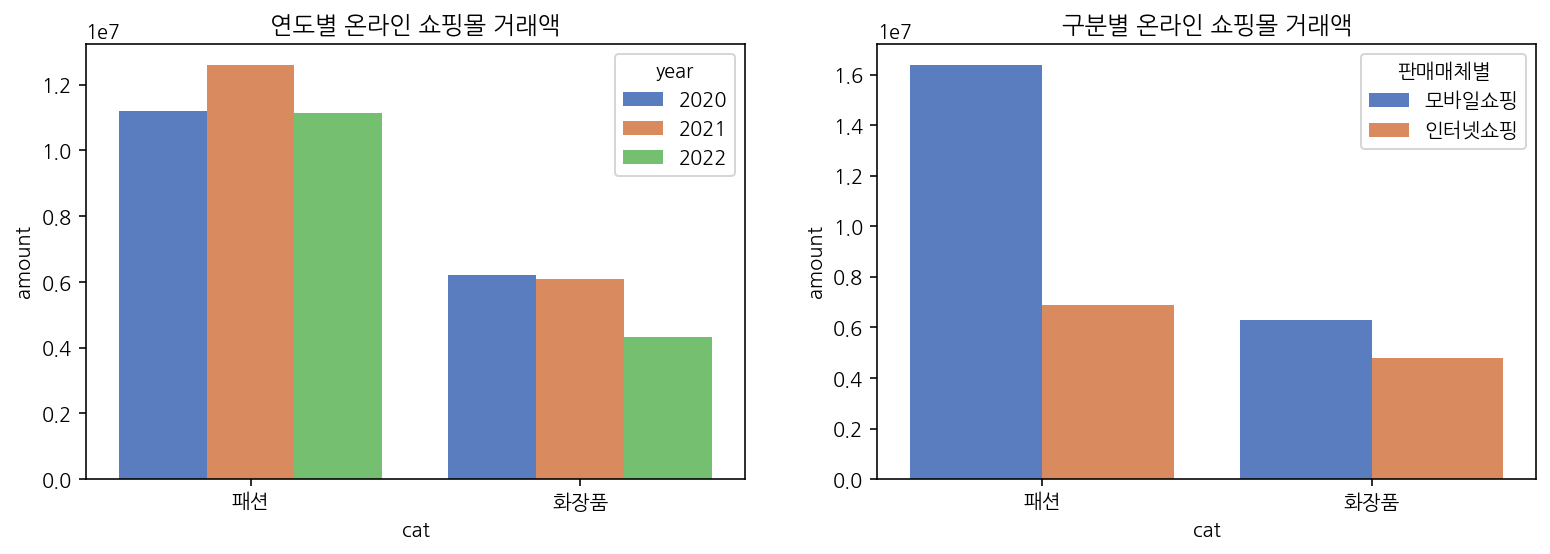

In [78]:
fig, (ax1, ax2) = plt.subplots(figsize=(13,4), ncols=2, nrows=1)

g = sns.barplot(data=online_year, x='cat', y='amount', hue='year', palette='muted', ci=None, ax=ax1)
g.set_title('연도별 온라인 쇼핑몰 거래액')

p = sns.barplot(data=online_year, x='cat', y='amount', hue='판매매체별', palette='muted', ci=None, ax=ax2)
p.set_title('구분별 온라인 쇼핑몰 거래액')

* 패션은 화장품 대비 온라인 쇼핑 거래액이 높은 수준이다. 

Text(0.5, 1.0, '패션')

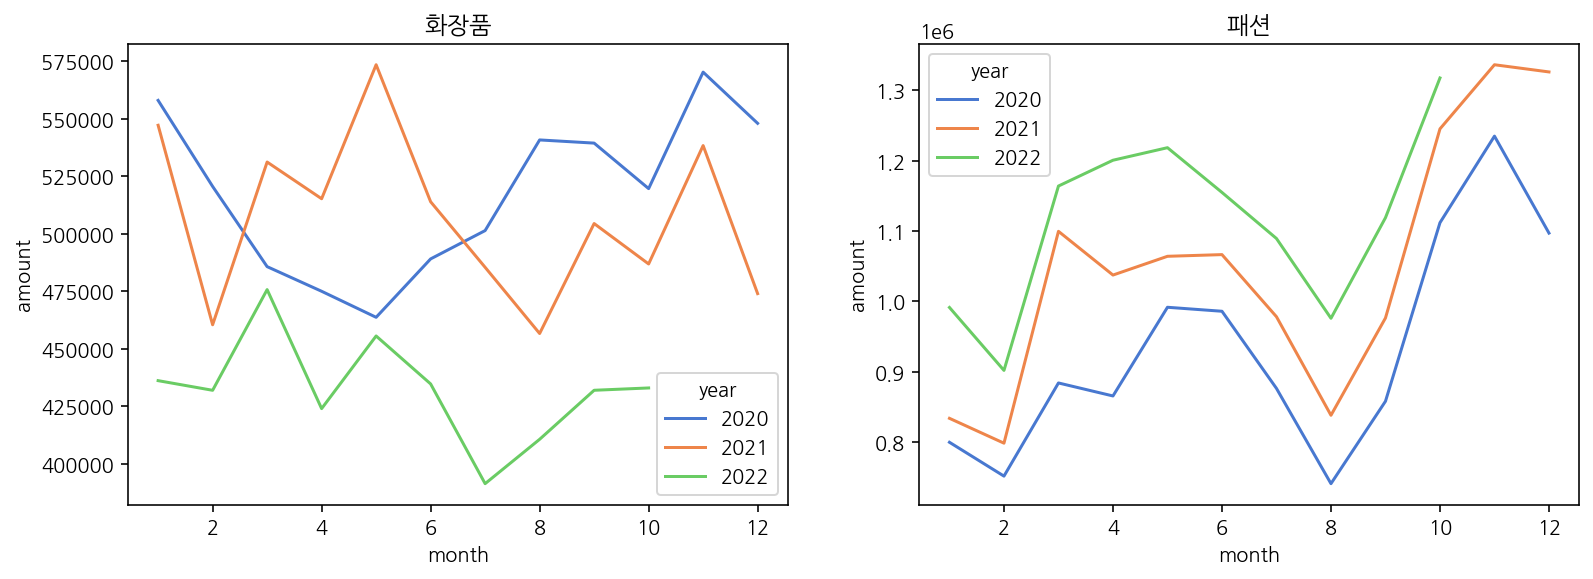

In [77]:
fig, (ax1, ax2) = plt.subplots(figsize=(13,4), ncols=2, nrows=1)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

g = sns.lineplot(data=online_yearmonth[online_yearmonth['cat']=='화장품'], x='month', y='amount', hue='year', palette='muted', ci=None, ax=ax1)
g.set_title('화장품') 

g = sns.lineplot(data=online_yearmonth[online_yearmonth['cat']=='패션'], x='month', y='amount', hue='year',palette='muted',  ci=None, ax=ax2)
g.set_title('패션') 

* 온라인 쇼핑몰 거래액은 패션 카테고리가 화장품보다 압도적으로 높다. 
* 2022 인터넷 쇼핑몰을 통한 화장품 구매가 급격히 하락하였다. 

Text(0.5, 1.0, '패션')

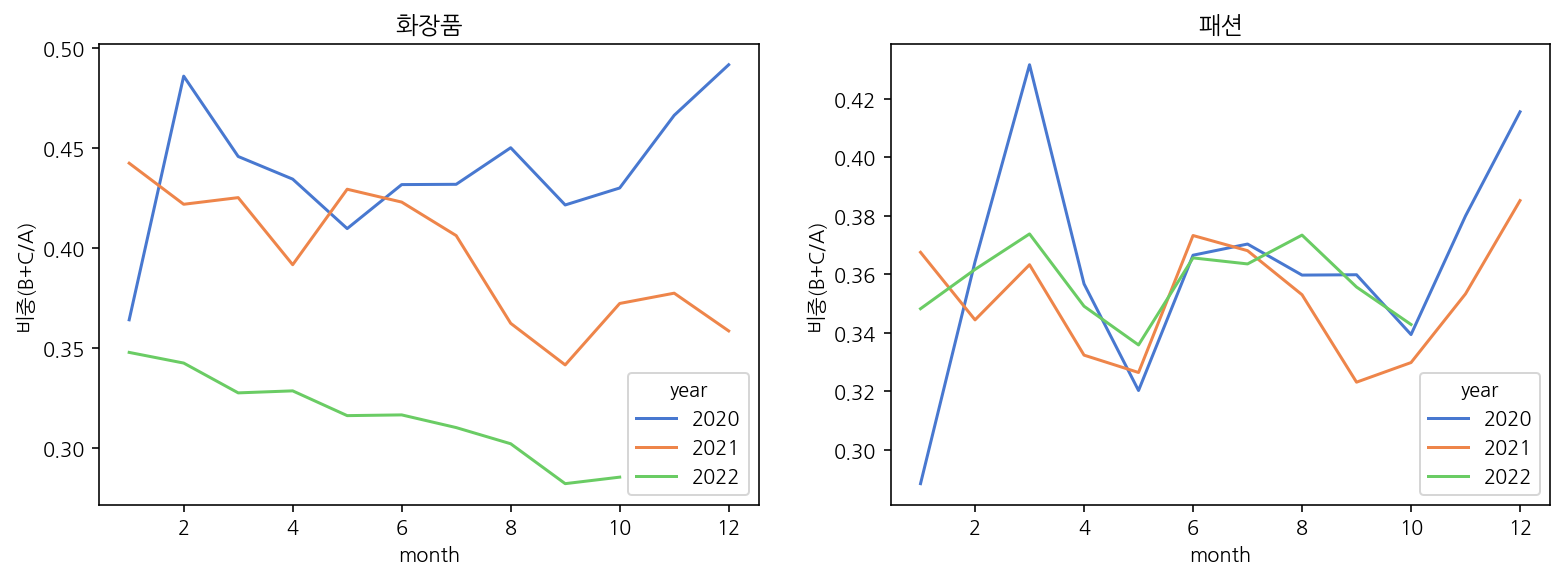

In [76]:
# 비중(B+C/A) : 화장품 소매판매액 중 온라인 쇼핑 거래액 비중 

fig, (ax1, ax2) = plt.subplots(figsize=(13,4), ncols=2, nrows=1)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

g = sns.lineplot(data=online_pivot[online_pivot['cat']=='화장품'], x='month', y='비중(B+C/A)', hue='year', ci=None, palette='muted',  ax=ax1)
g.set_title('화장품') 

g = sns.lineplot(data=online_pivot[online_pivot['cat']=='패션'], x='month', y='비중(B+C/A)', hue='year', ci=None,palette='muted',  ax=ax2)
g.set_title('패션') 

Text(0.5, 1.0, '패션')

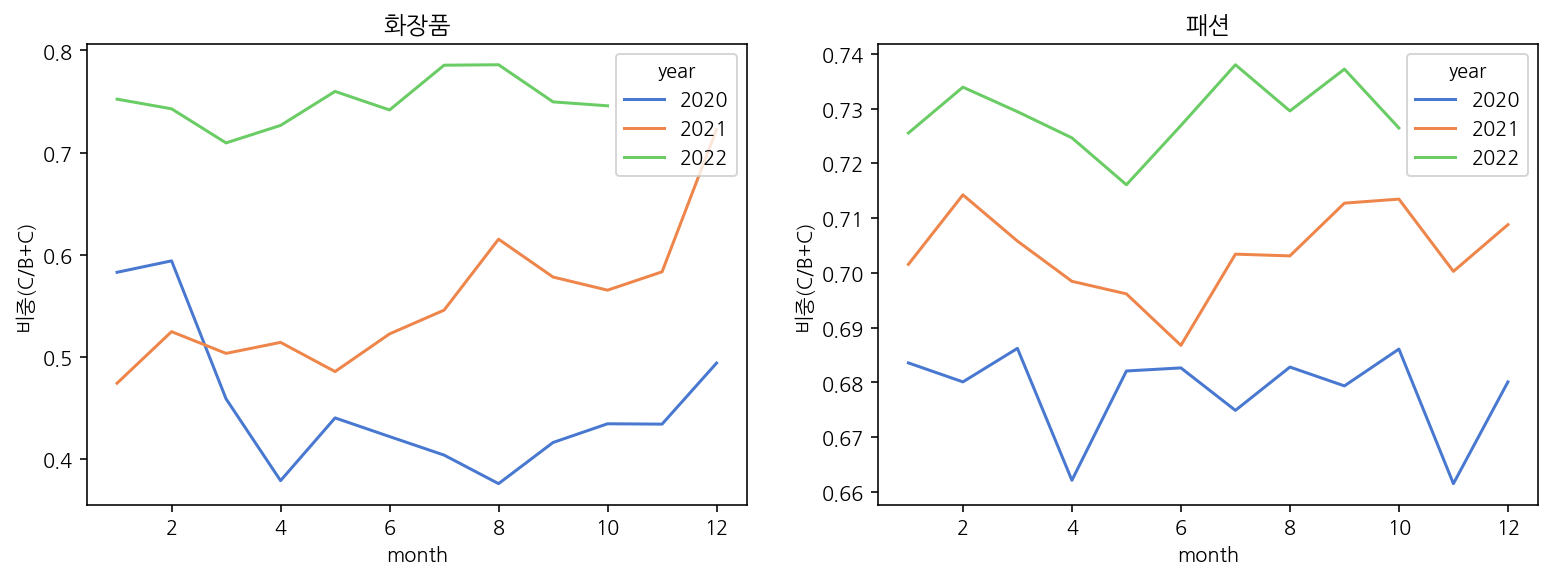

In [75]:
# 비중(C/B+C) : 화장품 온라인쇼핑 거래액에서 모바일 쇼핑이 차지하는 비중 

fig, (ax1, ax2) = plt.subplots(figsize=(13,4), ncols=2, nrows=1)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

g = sns.lineplot(data=online_pivot[online_pivot['cat']=='화장품'], x='month', y='비중(C/B+C)', hue='year', palette='muted', ci=None, ax=ax1)
g.set_title('화장품') 

g = sns.lineplot(data=online_pivot[online_pivot['cat']=='패션'], x='month', y='비중(C/B+C)', hue='year', palette='muted', ci=None, ax=ax2)
g.set_title('패션') 

* 소매판매액 중에서 온라인 쇼핑 거래액의 비중을 나타내는 **화장품 온라인 침투율**은 22년 9월 이후 30% 미만으로 급격하게 감소함. 
* 이는 화장품 소매판매액이 증가하고, 화장품 온라인 쇼핑 거래액은 감소했기 때문 

  → 소비자들이 화장품의 경우, 온라인에서는 주로 검색을 하고, 실제 구매는 오프라인에서 제품을 직접 확인하고 구매하는 경우가 많다. 

* 화장품의 경우 온라인 쇼핑 거래액에서 모바일 쇼핑이 차지하는 비중은 80%에 육박한다. 

  → 코로나19로 인해 스마트폰을 이용한 모바일 쇼핑이 크게 활성화되면서 온라인 쇼핑 중 모바일이 차지하는 비중은 갈수록 높아지고 있다. 

In [101]:
df = pd.read_csv('/content/drive/MyDrive/뷰티셀렉션/공공 데이터 포털 - 행정동별 서울생활인구 /소상공인시장진흥공단_상가(상권)정보_서울_202209.csv')

col = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명', '법정동명', '대지구분명', '지번본번지', '지번주소', '도로명', '건물본번지', '도로명주소', '경도', '위도']
df = df[col]

# 대분류 - 소매 
# 중분류 - 종합소매점, 화장품소매, 의복의류, 가방/신발/액세서리, 건강/미용식품
gu = df[df['상권업종대분류명']=='소매']
gu = gu[gu['상권업종중분류명'].isin(['종합소매점', '화장품소매', '의복의류', '가방/신발/액세서리', '건강/미용식품'])]

# 소분류 - 종합소매점인 경우, 백화점, 면세백화점만 남기고 삭제 
col = ['편의점', '종합소매', '수퍼마켓', '시장/종합상가', '수입품판매점', '할인점', '생활용품판매', '아케이드/쇼핑센타', '조합/연금매장', '구판장/직판장', '혼수전문점', '어판장']
gu = gu[~gu['상권업종소분류명'].isin(col)]

cos_gu = gu[gu['상권업종중분류명'].isin(['종합소매점', '화장품소매'])]
fas_gu = gu[gu['상권업종중분류명'].isin(['종합소매점', '의복의류', '가방/신발/액세서리'])] 
hea_gu = gu[gu['상권업종중분류명'].isin(['종합소매점', '건강/미용식품'])] 

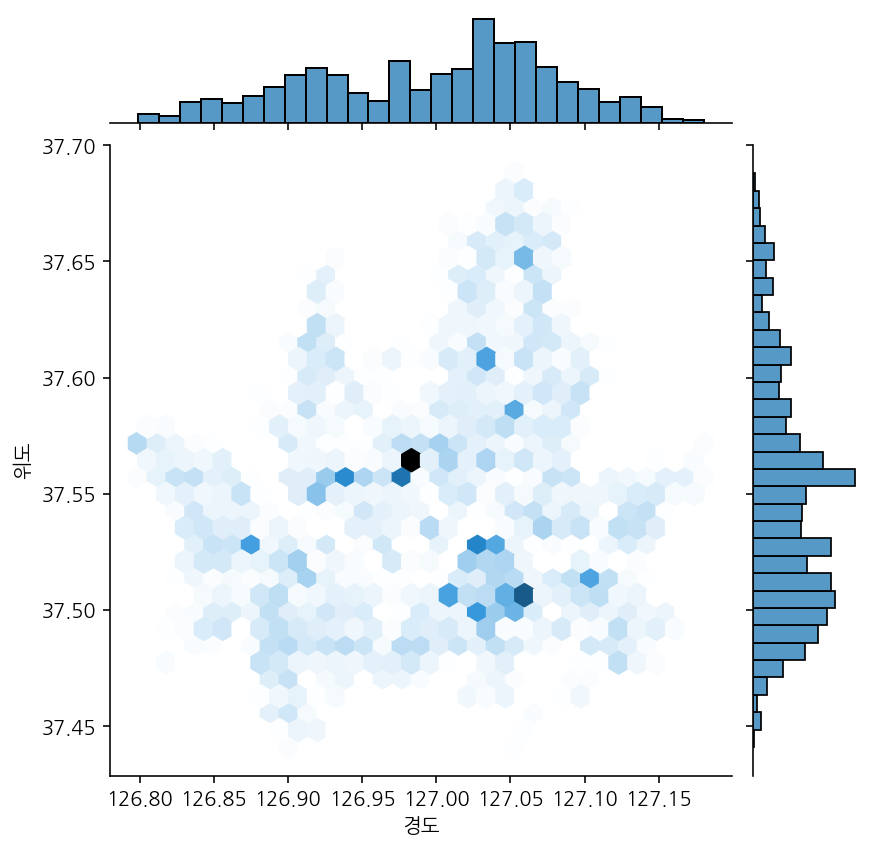

In [102]:
sns.jointplot(data=cos_gu, x='경도', y='위도', kind='hex')
plt.show()

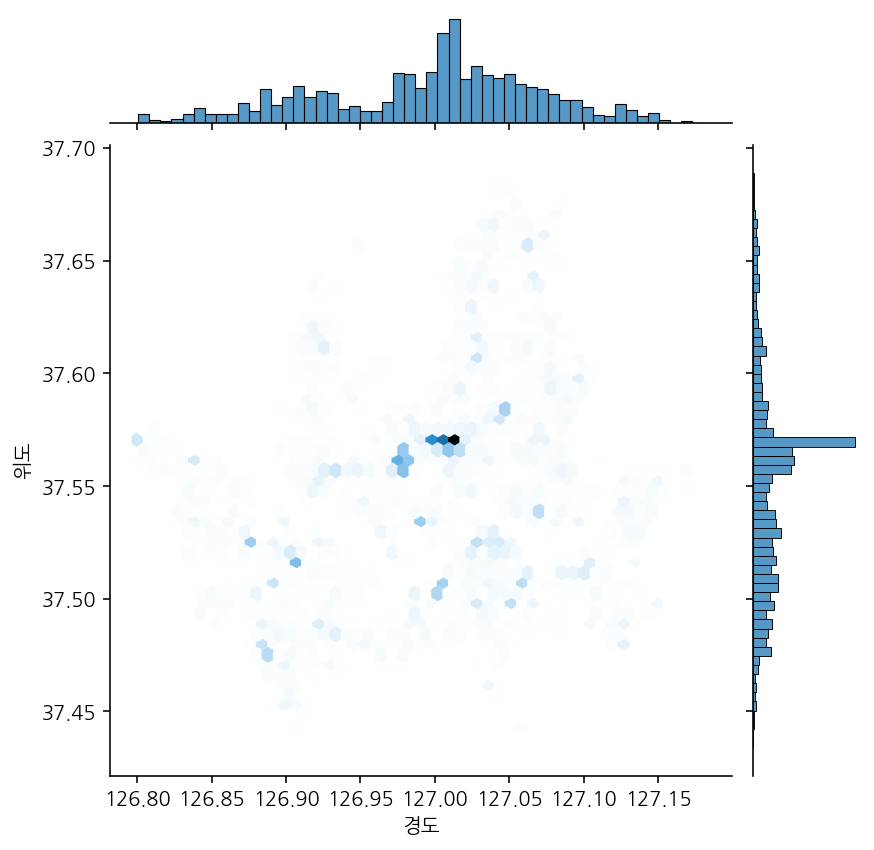

In [103]:
sns.jointplot(data=fas_gu, x='경도', y='위도', kind='hex')

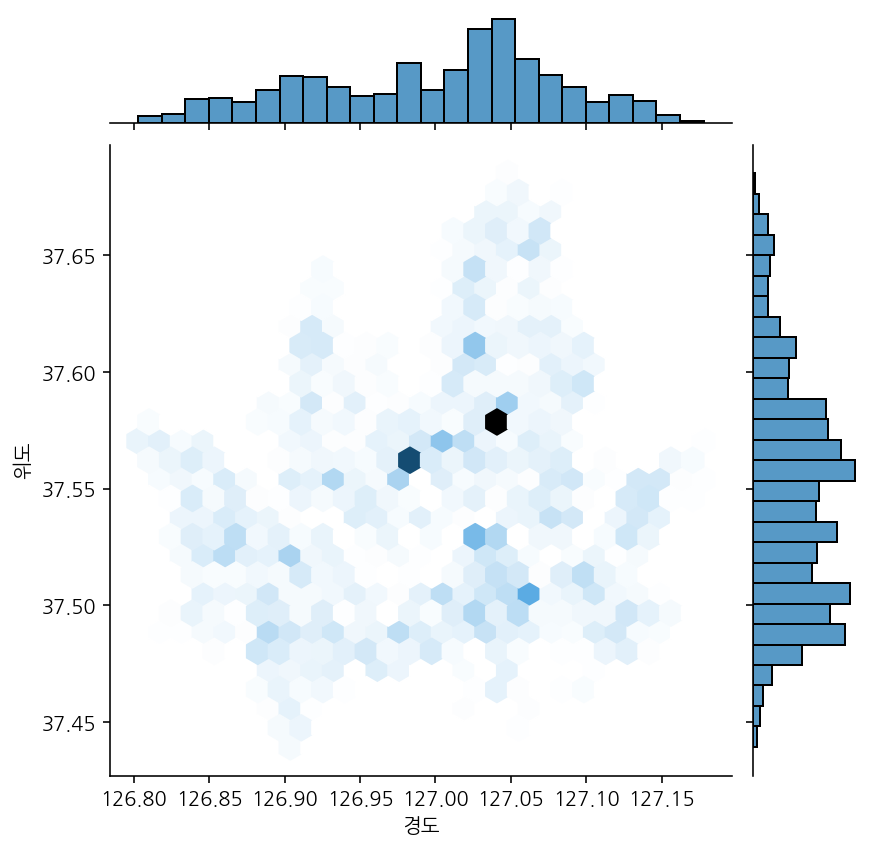

In [104]:
sns.jointplot(data=hea_gu, x='경도', y='위도', kind='hex')

* 패션의 경우 오프라인 입지가 특정 행정구에만 치중되어 있어 접근성 낮음 (온라인 쇼핑몰을 통한 구매가 높음을 반증) 

* 반면, 화장품의 경우 강남구를 기준으로 오프라인 접근성이 높다. 

## 업태별 화장품 소비 변화 

In [79]:
ds = pd.read_csv('/content/drive/MyDrive/뷰티셀렉션/업태별상품군_판매액지수_2015100.0__20221208231614.csv', encoding='cp949')
ds = ds[ds['업태별상품군'].str.contains('총지수')]
ds = pd.melt(ds, id_vars='업태별상품군', var_name='yearmonth', value_name='경상지수')
ds

,업태별상품군,yearmonth,경상지수
0,백화점 총지수,2020.01,105.4
1,대형마트 총지수,2020.01,118.5
2,면세점 총지수,2020.01,264.1
3,전문소매점 총지수,2020.01,95.1
4,무점포 소매 총지수,2020.01,175.3
...,...,...,...
165,백화점 총지수,2022.10 p),142.5
166,대형마트 총지수,2022.10 p),103.6
167,면세점 총지수,2022.10 p),246.0
168,전문소매점 총지수,2022.10 p),100.9


In [80]:
# 2022.09 p), 2022.10 p) 날짜 전처리 
ds['yearmonth'] = ds['yearmonth'].apply(lambda x : '2022.09' if x == '2022.09 p)' else x)
ds['yearmonth'] = ds['yearmonth'].apply(lambda x : '2022.10' if x == '2022.10 p)' else x)

# 구매일을 일시 형식으로 포맷팅 
ds['yearmonth'] = pd.to_datetime(ds['yearmonth']).dt.strftime('%Y-%m')
ds['year'] = pd.to_datetime(ds['yearmonth']).dt.year
ds['month'] = pd.to_datetime(ds['yearmonth']).dt.month
ds['경상지수'] = ds['경상지수'].astype(float)

# 업태별상품군 전처리 
ds['업태별상품군'] = ds['업태별상품군'].str.split('총지수', expand=True)[0]

ds_year = ds.groupby(['업태별상품군','year'])['경상지수'].mean().reset_index().sort_values(ascending=False, by='경상지수')
ds_yearmonth = ds.groupby(['업태별상품군', 'year', 'month'])['경상지수'].mean().reset_index().sort_values(ascending=False, by='경상지수')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

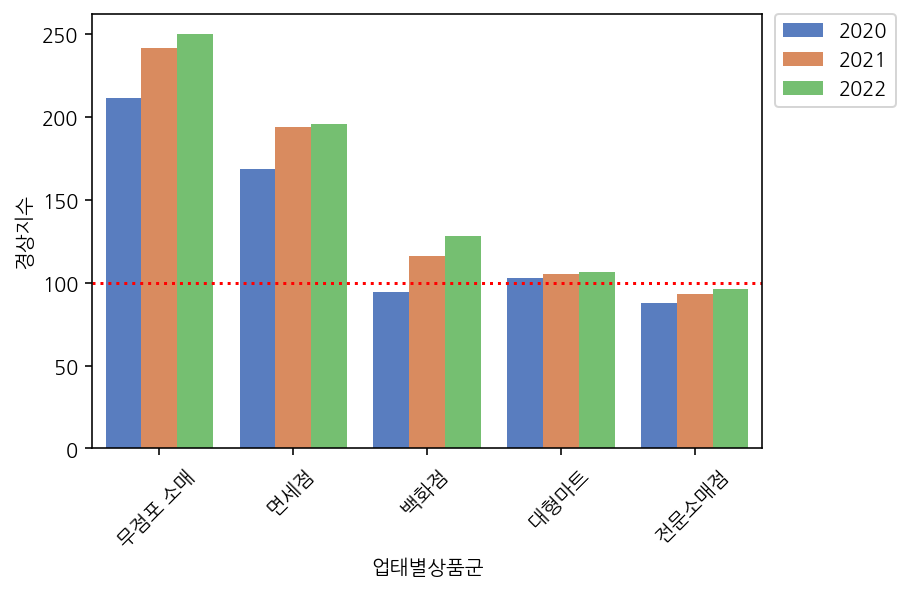

In [81]:
g = sns.barplot(data=ds_year, x='업태별상품군', y='경상지수', hue='year', palette='muted', ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) 
g.axhline(100, label='Mean', linestyle=':', color='red')
plt.xticks(rotation=45)

* 화장품의 경우 **무점포 소매, 면세점**을 통한 매출이 상위권이다. 
* 코로나 이후 일상회복에 따라서 업태별 판매액 지수는 전문소매점(로드숍)을 제외하고 모두 매출이 호전되었다. 

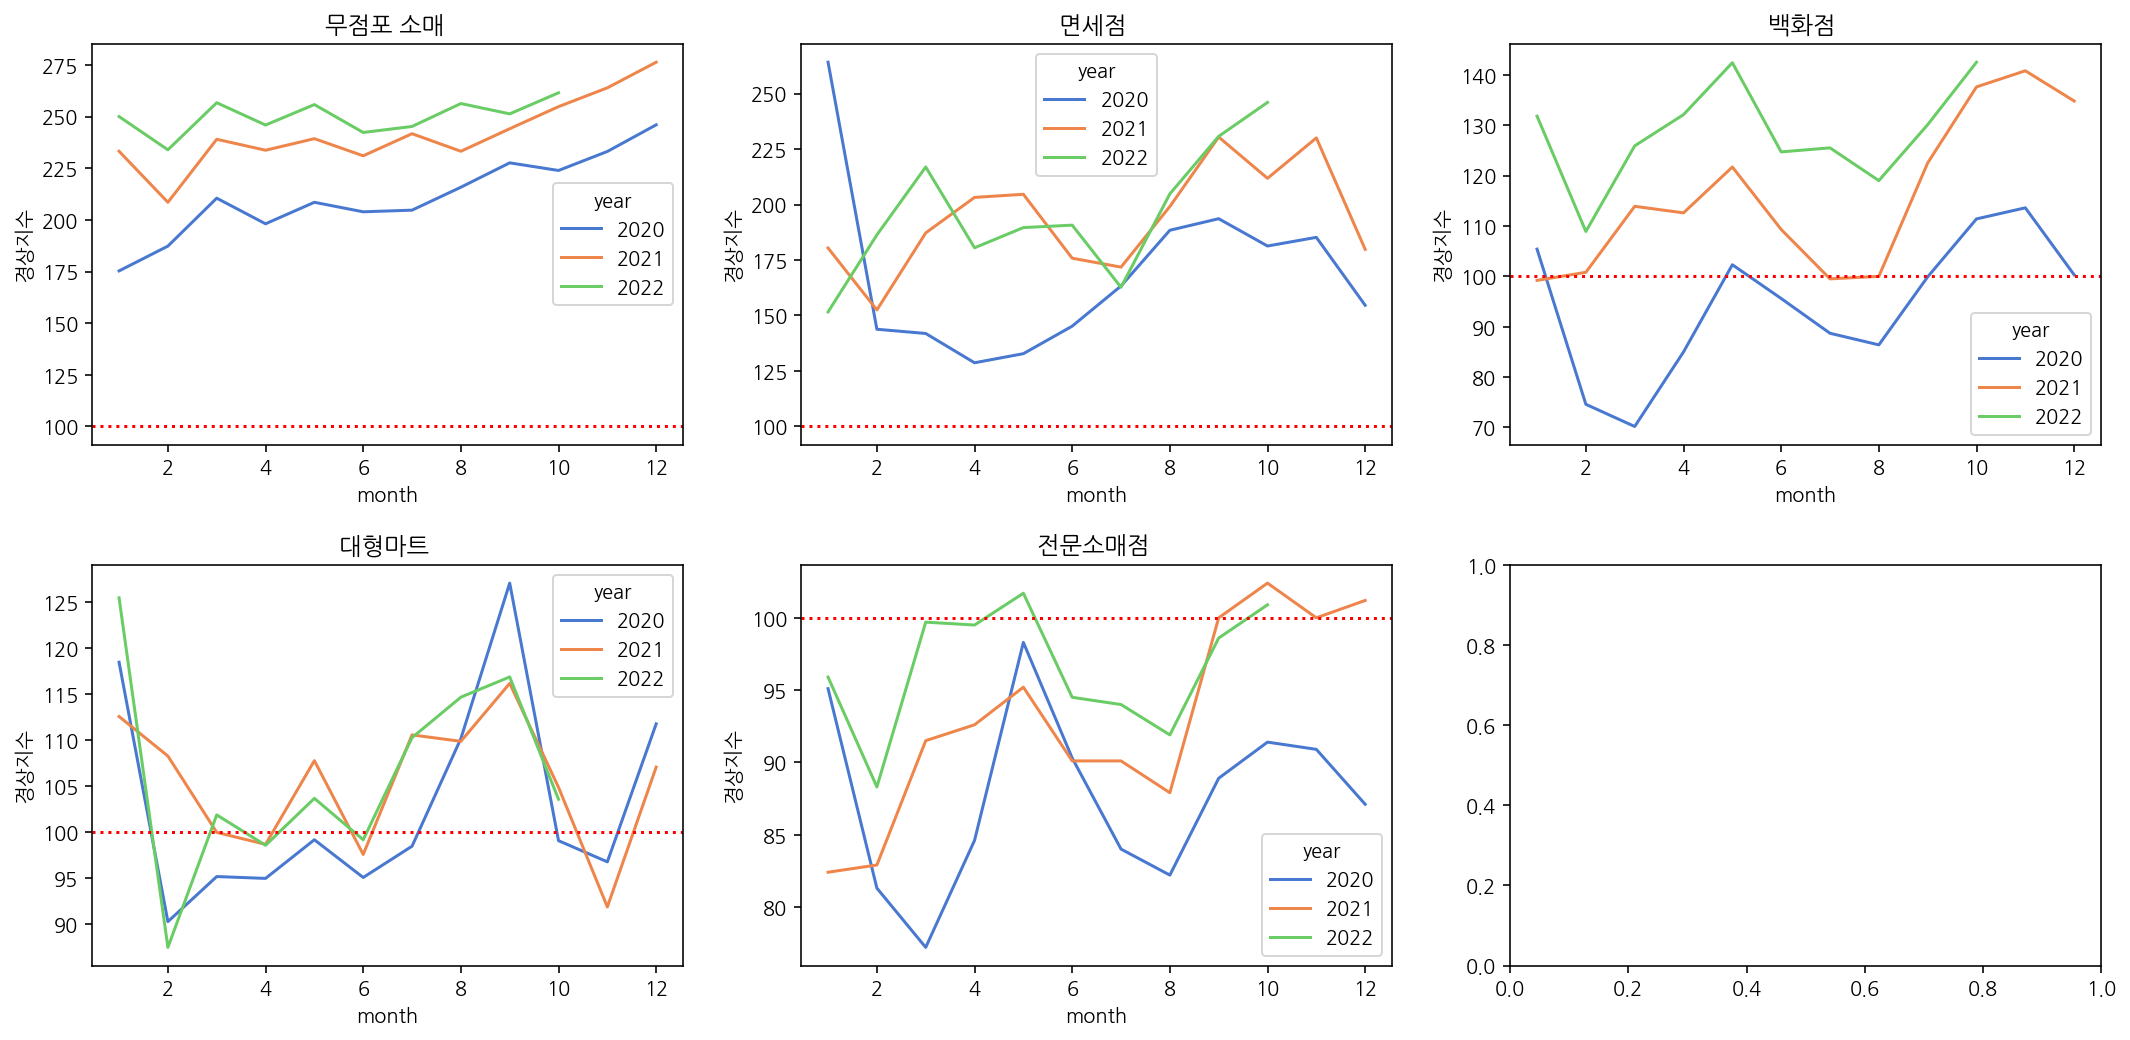

In [84]:
cat_features = ds_yearmonth['업태별상품군'].value_counts().index

fig, axs = plt.subplots(figsize=(18,8), ncols=3, nrows=2)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

for i, feature in enumerate(cat_features):
    row = int(i/3)
    col = i%3
    g = sns.lineplot(data=ds_yearmonth[ds_yearmonth['업태별상품군']==feature], x='month', y='경상지수', hue='year', palette='muted', ax=axs[row][col])
    g.axhline(100, label='Mean', linestyle=':', color='red')
    g.set_title(feature) # seaborn에 title 추가 

* **무점포 소매**를 통한 매출이 가장 상위에 있다. (무점포 상권: TV홈쇼핑, 인터넷 쇼핑몰, 오픈마켓, 소셜커머스)
  * 쿠팡, 네이버 스마트스토어 등 온라인 셀러 활동이 활성화되면서 무점포 소매를 통한 매출이 가장 성장한 것으로 보인다. 

* 로드숍 등 전문소매점은 경상지수가 100 이하로 매년 매출이 하락하였다. 
  * 이는 국내 H&B 시장이 올리브영을 독점적으로 재편되었고,
  * 작아진 H&B 시장에서 올리브영을 제외한 H&B 스토어의 매출이 하락세임을 의미한다.  

In [85]:
# 첫번째 행을 컬럼으로 지정 
df = pd.read_csv('/content/drive/MyDrive/뷰티셀렉션/전자상거래시_구매정보_습득을_위해_우선적으로_이용하는_채널_20221209004323.csv', encoding='cp949')
df = df.rename(columns=df.iloc[0]).iloc[2:,:]

# 백분율 변환 
df = pd.melt(df, id_vars=['구분별(1)', '구분별(2)', '사례수 (명)'], var_name='variable', value_name='value')
df['사례수 (명)'] = df['사례수 (명)'].astype(float)
df['value'] = df['value'].astype(float)
df['value'] = round(df['사례수 (명)']*(df['value']/100),1)

# 사례수 (명) 컬럼 삭제 
df = df.drop('사례수 (명)', axis=1)

# (%) 삭제 
df['variable'] = df['variable'].str.split('(', expand=True)[0]

# 연령, 성별만 추출 
df = df[df['구분별(1)'].str.contains('연령|성별')]
sex = df[df['구분별(1)']=='성별'].iloc[:, 1:].sort_values(ascending=False, by='value')
age = df[df['구분별(1)']=='연령'].iloc[:, 1:].sort_values(ascending=False, by='value')

Text(0.5, 1.0, '연령')

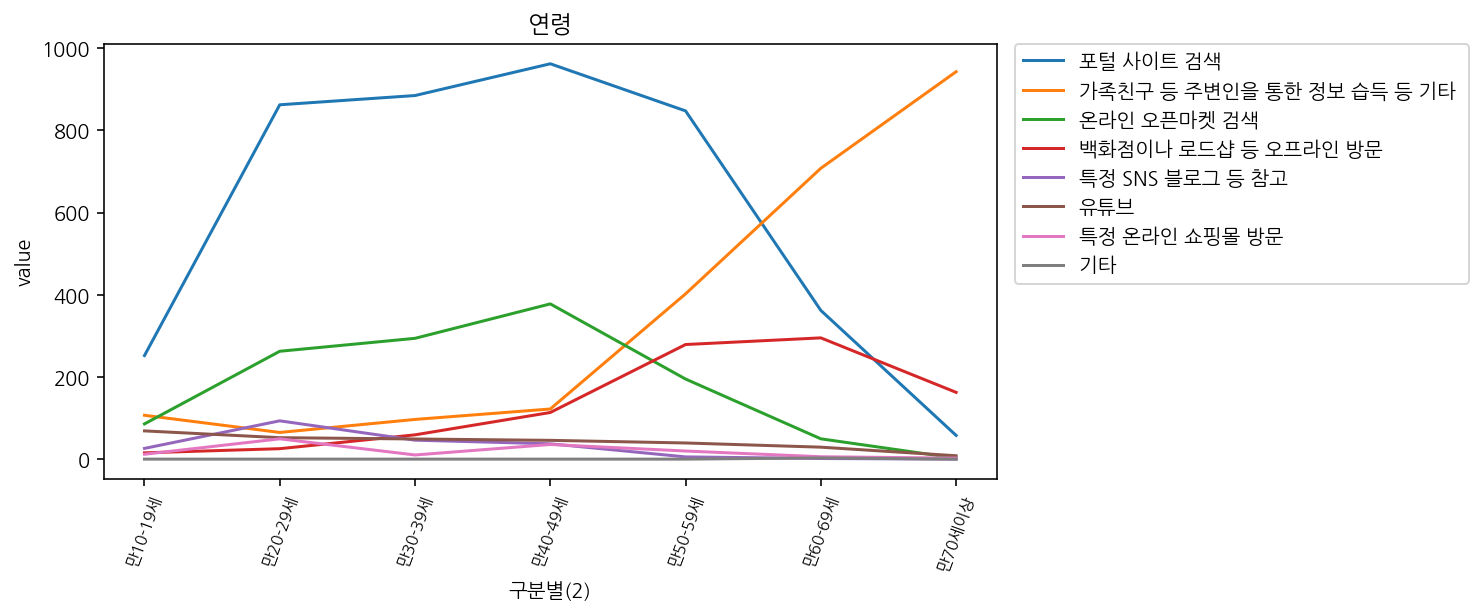

In [87]:
# 연령별로 정렬
sort = ['만10-19세', '만20-29세', '만30-39세', '만40-49세', '만50-59세','만60-69세', '만70세이상']
age['구분별(2)'] = pd.Categorical(age['구분별(2)'], categories=sort, ordered=True)

plt.figure(figsize=(8, 4))
g = sns.lineplot(data=age, x='구분별(2)', y='value', hue='variable', ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) 
plt.xticks(rotation=70, size=8)
g.set_title('연령')

* MZ 세대의 경우 이커머스를 통한 구매시 포털 사이트와 **온라인 오픈마켓**을 주로 검색한다. 
* 50대 이후 주변인을 통한 정보 습득과 오픈라인 방문이 높은 특징이 있다. (고연령일수록 온라인 접근성 낮음) 

# 3. 결론 

## 소결 
1. **포스트 코로나 이후 화장품 시장은 유망한가?**
  * 화장품의 소비 지수는 연 평균 120 이상으로 코로나의 영향을 받지 않은 것으로 보인다. (오히려 코로나로 인해 매출이 반등)
  * 패션은 코로나의 영향으로 매출이 감소하였지만, 이후 매출이 호전되는 추세 
  * 의약품은 2022년 가장 매출이 큰 폭으로 성장한 카테고리  
    * 포스트 코로나 이후 뷰티 시장은 상승세이며, 건기식/패션 카테고리 확장시에도 유망하다.

2. **오프라인/온라인 소비 변화는 어떠한가?**
  * 소매판매액 중에서 온라인 쇼핑 거래액의 비중을 나타내는 화장품 온라인 침투율은 30% 미만으로 급격하게 하락했다.
    * 이는 화장품 소매판매액이 증가하고, 화장품 온라인 쇼핑 거래액은 감소했기 때문이다.  
  * 패션은 오프라인 입지가 특정 행정구에만 치중되어 있어 접근성이 낮은 반면, 화장품은 강남구를 기준으로 오프라인 접근성이 높다. 
    * 소비자들이 화장품의 경우, 온라인에서는 주로 검색을 하고, 실제 구매는 오프라인에서 제품을 직접 확인하고 구매하는 경우가 많다.
    * 뷰티 시장에서 온라인 유통이 강세이지만, 화장품 소비 시장의 특성상 오프라인 접점 확보는 필요하다.
  
  * 화장품의 경우 온라인 쇼핑 거래액에서 모바일 쇼핑이 차지하는 비중은 80%에 육박한다.  
    * 코로나19로 인해 모바일 쇼핑이 크게 활성화되면서 모바일 커머스의 비중이 갈수록 높아지고 있다. 

3. **업태별 소비 변화는 어떠한가?** 
  * 화장품은 무점포 소매(TV 홈쇼핑, 인터넷 쇼핑몰, 오픈마켓, 소셜 커머스)를 통한 소비지수가 가장 높다.  
  * MZ 세대의 경우 이커머스를 통한 구매 시 포털 사이트와 온라인 오픈마켓을 통해 정보를 습득한다.
    * 쿠팡, 네이버 스마트스토어 등 온라인 셀러 활동이 활성화되면서 무점포 소매를 통한 매출이 가장 늘어난 것으로 보인다.
  * 로드숍 등 전문소매점은 경상지수가 100 이하로 매년 매출이 하락하였다.
    * 국내 H&B 시장이 올리브영의 독주로 재편되었고, 나머지 H&B 스토어의 매출이 하락세임을 의미한다.

## 대응 방향 

1. 전략 수립 
  * 브랜드사/인플루언서에게 필요한 모든 인프라를 제공하는 슈퍼 플랫폼으로서 D2C 고도화
    * 고객 접점을 효과적으로 늘리기 위해서 메가 인플루언서를 확보하고,
    * 팔로워를 핵심 사용자로 전환하기 위해 자사몰을 고도화한다.

2. 근거 

  * 뷰티 셀렉션은 셀러마다 독립된 자사몰을 구축하고, 인플루언서 커머스 채널을 활용해, 자사몰 유입 고객을 효과적으로 획득할 수 있는 강점이 있다. 
    * 인플루언서 커머스만의 BM을 강화하여 뷰티 시장에서의 온라인 침투율을 독점적으로 높일 수 있는 기회로 삼을 수 있다. 
    * 자사몰을 구축 시 모바일 커머스에 집중한다.  

  * 고객 접점을 늘리기 위해서 최저가 전략을 내세우는 오픈마켓 입점은 MZ 세대에게 소구 가능성이 낮다.
    * MZ 세대의 변화된 소비문화에 맞춰 인플루언서를 활용한 오프라인 팝업 운영 
    * 스몰 브랜드를 위한 자사몰 구축 등 브랜딩을 강화하는 전략이 더욱 효과적일 것이다.  

  * 작아진 H&B 시장에서 플랫폼 입점만으로 신생 브랜드가 성과를 내기 어려운 구조이다.
    * 신생 브랜드의 성장을 위해 필요한 모든 인프라를 제공하는 애그리게이터로서의 역할을 공고히 할 수 있다.  


3. 구체적인 실행 방안 
  * **메가 인플루언서 확보 및 자사몰 강화**
    * 셀러마다 독립된 자사몰에서 자체 캠페인을 운영하는 전략
    * 제품 개발부터 마케팅 전략까지 인플루언서가 주도
    * 이는 스몰 브랜드가 성장할 기회를 마련함과 동시에
    * 팔이피플이 아닌, 인플루언서 커머스만의 순기능을 극대화할 수 있음.
    * 메가 인플루언서를 연쇄적으로 확보하기 위해서는 성공 레퍼런스를 확보하는 것이 가장 우선순위 높음.

  * **오프라인 팝업 운영**
    * MZ 상권을 중심으로 오프라인 팝업 운영
    * 인플루언서 캠페인과 연계하여 2차 온라인 접점 확보
    * 인플루언서 채널을 통한 3차 자사몰 유입으로 자사몰에 집중하는 전략(D2C)

  * **인플루언서 신뢰지수**
    * 신뢰 지수는 구매 전환율을 높이기 위한 Key Metric으로 활용
    * 신뢰 지수를 높일 수 있는 액션을 정책으로 만들어서 인플루언서 활동 가이드로 지침
    * 뷰티 셀렉션의 입장에서는 인플루언서를 관리할 수 있는 모니터링 지표로 활용,
    * 성과 지표를 기반으로 더 큰 성공 사례를 만들 수 있도록 견인

## 한계 및 시사점 
* 통계청, 공공 데이터 포털 등 접근 가능한 데이터만을 활용하여, 인플루언서 커머스 분석 부재 
* 통계청에서 업태별 상품군 데이터에서 건기식은 카테고리에서 제외되어 분석 할 수 없음  
* 고객 데이터를 기반으로 고객 니즈에 따른 판매 채널 전략 수립 필요  